In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names )

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df["target"] = data.target

In [6]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
s = data.images[1]

<Figure size 640x480 with 0 Axes>

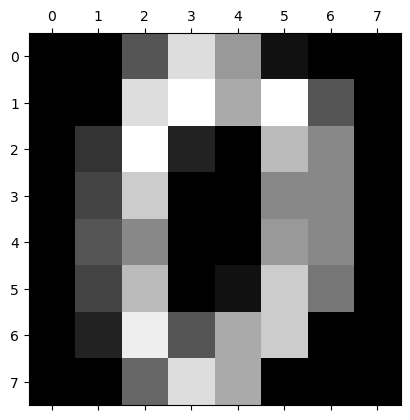

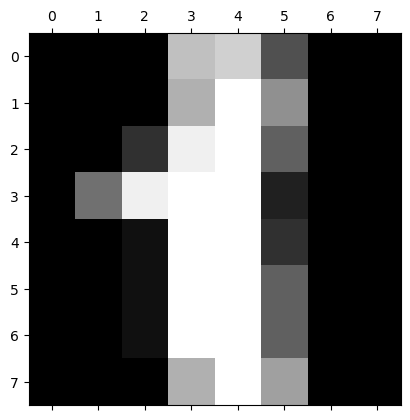

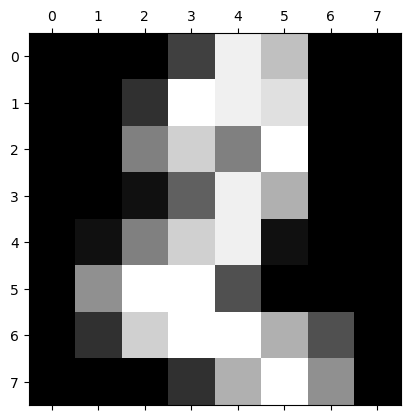

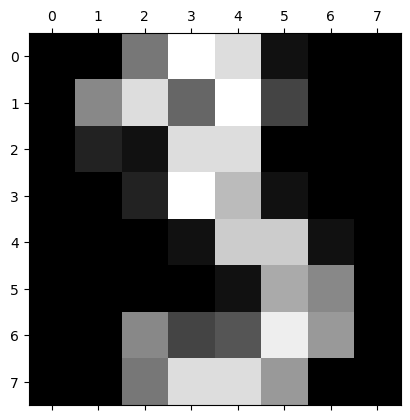

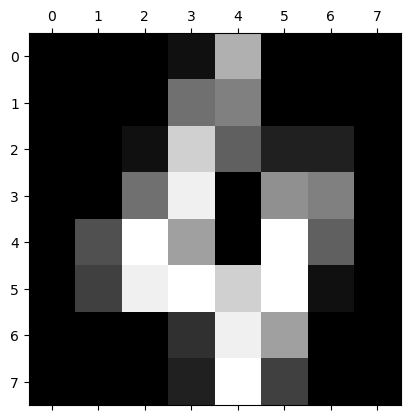

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(data.images[i])
    plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X= df.drop('target',axis=1)
y=df.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
df.shape

(1797, 65)

In [14]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9629629629629629

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=30)

In [17]:
pca_x = pca.fit_transform(X)

In [18]:
pca_x.shape

(1797, 30)

In [19]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_x, y, test_size=0.33, random_state=42)

In [20]:
model1 = LogisticRegression(max_iter=3000)
model1.fit(X_train_pca, y_train)
model1.score(X_test_pca,y_test)

0.9612794612794613

In [21]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123,   5.1558669 ])

In [22]:
len(pca.explained_variance_)

30

In [23]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888])